In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Set visualization style
plt.rcParams['figure.figsize'] = (12, 6)

# Load datasets
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')

# Quick check - display shape of each dataset
print("Dataset shapes:")
print(f"Orders: {orders.shape}")
print(f"Order Items: {order_items.shape}")
print(f"Products: {products.shape}")
print(f"Customers: {customers.shape}")
print(f"Payments: {payments.shape}")

Dataset shapes:
Orders: (99441, 8)
Order Items: (112650, 7)
Products: (32951, 9)
Customers: (99441, 5)
Payments: (103886, 5)


In [4]:
# Convert date columns to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Check for missing values in key columns
print("Missing values check:")
print(f"Orders - order_id: {orders['order_id'].isna().sum()}")
print(f"Orders - customer_id: {orders['customer_id'].isna().sum()}")
print(f"Payments - payment_value: {payments['payment_value'].isna().sum()}")
print(f"Products - product_category_name: {products['product_category_name'].isna().sum()}")

# Display first few rows of orders
print("\nFirst 3 orders:")
orders.head(3)

Missing values check:
Orders - order_id: 0
Orders - customer_id: 0
Payments - payment_value: 0
Products - product_category_name: 610

First 3 orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


Monthly Revenue Trend:
     month    revenue
0  2016-10   46566.71
1  2016-12      19.62
2  2017-01  127545.67
3  2017-02  271298.65
4  2017-03  414369.39

First month revenue: $46,566.71
Last month revenue: $985,414.28


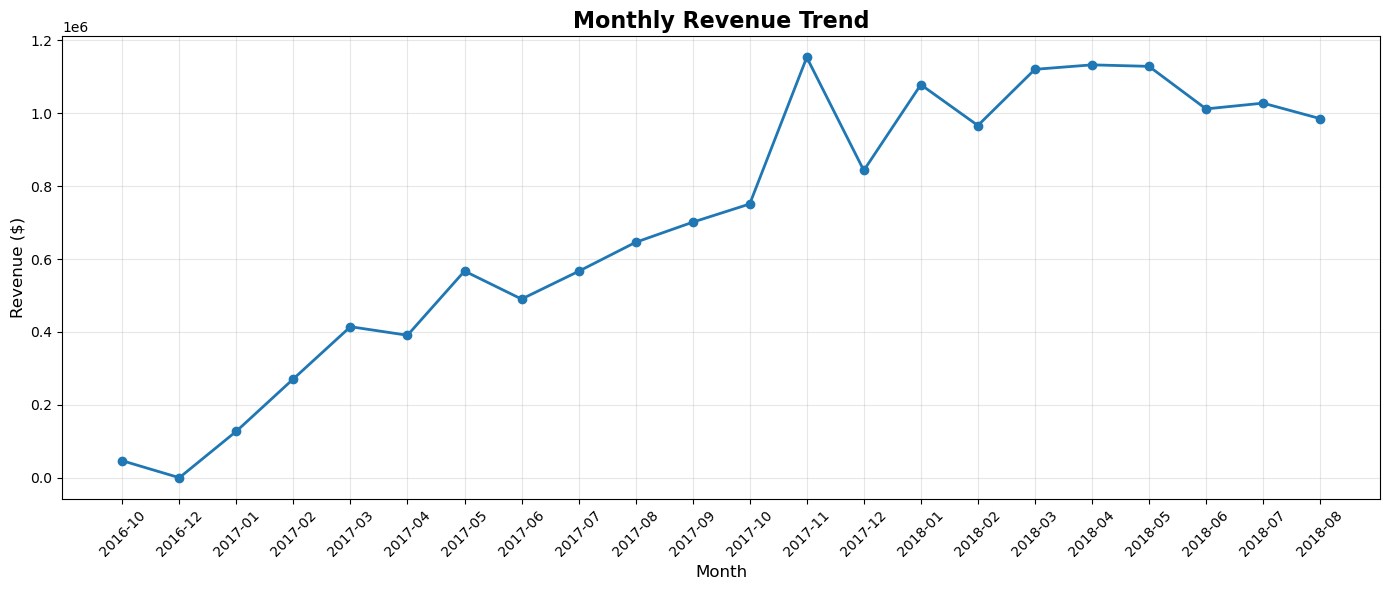

In [6]:
# Merge orders with payments
orders_payments = orders.merge(payments, on='order_id', how='inner')

# Filter for delivered orders only
delivered_orders = orders_payments[orders_payments['order_status'] == 'delivered'].copy()

# Extract month and calculate monthly revenue
delivered_orders['month'] = delivered_orders['order_purchase_timestamp'].dt.to_period('M')
monthly_revenue = delivered_orders.groupby('month')['payment_value'].sum().reset_index()
monthly_revenue.columns = ['month', 'revenue']

# Display results
print("Monthly Revenue Trend:")
print(monthly_revenue.head())
print(f"\nFirst month revenue: ${monthly_revenue['revenue'].iloc[0]:,.2f}")
print(f"Last month revenue: ${monthly_revenue['revenue'].iloc[-1]:,.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_revenue['month'].astype(str), monthly_revenue['revenue'], marker='o', linewidth=2)
plt.title('Monthly Revenue Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Top 10 Categories by Revenue:
                  category     revenue
13         cama_mesa_banho  1712553.67
11            beleza_saude  1657373.12
44  informatica_acessorios  1585330.45
54        moveis_decoracao  1430176.39
66      relogios_presentes  1429216.68
32           esporte_lazer  1392127.56
72   utilidades_domesticas  1094758.13
8               automotivo   852294.33
40      ferramentas_jardim   838280.75
26              cool_stuff   779698.00


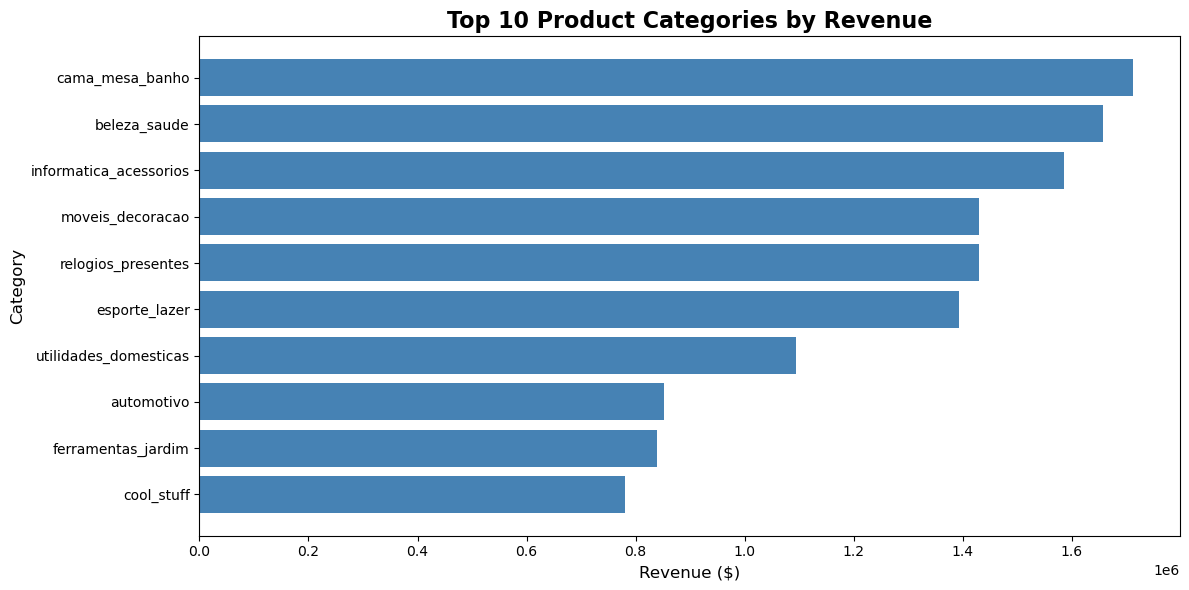

In [7]:
# Merge order_items with products and payments
category_data = order_items.merge(products, on='product_id', how='left')
category_data = category_data.merge(payments, on='order_id', how='left')

# Remove missing categories
category_data = category_data[category_data['product_category_name'].notna()]

# Calculate revenue by category
category_revenue = category_data.groupby('product_category_name')['payment_value'].sum().reset_index()
category_revenue.columns = ['category', 'revenue']
category_revenue = category_revenue.sort_values('revenue', ascending=False).head(10)

# Display top 10
print("Top 10 Categories by Revenue:")
print(category_revenue)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(category_revenue['category'], category_revenue['revenue'], color='steelblue')
plt.title('Top 10 Product Categories by Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Order Status Distribution:
  order_status  count  percentage
0    delivered  96478       97.02
1      shipped   1107        1.11
2     canceled    625        0.63
3  unavailable    609        0.61
4     invoiced    314        0.32
5   processing    301        0.30
6      created      5        0.01
7     approved      2        0.00


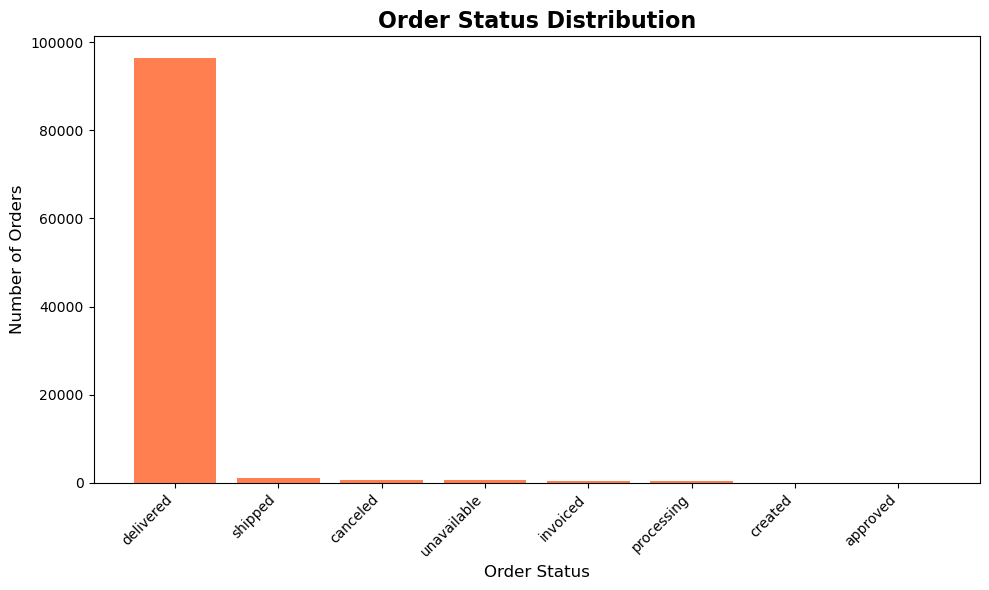

In [8]:
# Calculate order status distribution
status_distribution = orders['order_status'].value_counts().reset_index()
status_distribution.columns = ['order_status', 'count']
status_distribution['percentage'] = (status_distribution['count'] / len(orders) * 100).round(2)

# Display
print("Order Status Distribution:")
print(status_distribution)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(status_distribution['order_status'], status_distribution['count'], color='coral')
plt.title('Order Status Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()